# DATA EXPLORATION
Dànae Canillas Sánchez

In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns

path_file = "data/pathwayscores_clinicalinformation_METABRIC.tsv"
data = pd.read_csv(path_file, sep='\t')

data["stage"] = data["stage"].dropna().astype(int).astype("category")
data["binned_age"] = data["age_at_diagnosis"].round().astype(int).astype("category")
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
data["binned_age"] = pd.cut(data["binned_age"], range(0, 105, 10), right=False, labels=labels)

data["binned_RFS"] = data["RFS"].dropna().astype(int).astype("category")
labels = ["{0} - {1}".format(i, i + 999) for i in range(0, 10000, 1000)]
data["binned_RFS"] = pd.cut(data["binned_RFS"].dropna(), range(0, 10001, 1000), right=False, labels=labels)

data.to_csv("data/pathwayscores.csv",index=False)

## Value ranges

In [2]:
def range_boxplot(kind):
    '''
    Continuous variables 
    -> kind:: ['genes', 'age_at_diagnosis', 'RFS']
    '''
    if kind == "genes":
        fig = px.box(data.dropna()[['Cell_Cycle', 'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53', 'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2']], title = "Gene box plot", orientation='v', height = 500, width= 1000)
    
    else:
        fig = px.box(data.dropna()[kind], title = kind + " boxplot", orientation='h', height = 500, width= 1000)
        
    fig.show()

In [3]:
range_boxplot("genes")

## Conditioned Ranges

In [4]:
def cond_range_boxplot(kind):
    '''
    Discrete variables 
    -> kind:: ['age', 'RFS', 'stage','PAM50','RFSE']
    '''
    features = ['Cell_Cycle', 'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53', 'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2']

    order = {"age": {"binned_age": ["20 - 29", "30 - 39","40 - 49","50 - 59","60 - 69","70 - 79","80 - 89","90 - 99"]}, "RFS": {"binned_RFS": ["0 - 999", "1000 - 1999","2000 - 2999","3000 - 3999","4000 - 4999","5000 - 5999","6000 - 6999","7000 - 7999"]}}

    if kind == "age":
        features.append('binned_age')
        fig = px.box(data.dropna()[features], title = "Gene boxplot conditioned by " + kind, color="binned_age", orientation='v', height = 500, width= 1000, category_orders=order["age"])

    elif kind == "RFS":
        features.append('binned_RFS')
        fig = px.box(data.dropna()[features], title = "Gene boxplot conditioned by " + kind, color="binned_RFS", orientation='v', height = 500, width= 1000, category_orders=order["RFS"])

    else:
        features.append(kind)
        fig = px.box(data.dropna()[features], title = "Gene boxplot conditioned by " + kind, color=kind, orientation='v', height = 500, width= 1000)
    fig.show()


In [5]:
cond_range_boxplot("RFSE")

## Value distribution



In [6]:
def pie_plot(kind):
    '''
    Discrete variables 
    -> kind:: ['binned_age', 'binned_RFS', 'stage', 'PAM50', 'RFSE']
    '''  

    labels = data[kind].value_counts().index
    values = data[kind].value_counts().values

    fig = px.pie(labels=labels, values=values, names=labels, title=kind + ' pie chart')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

## Missing values

## Correlation

<AxesSubplot:>

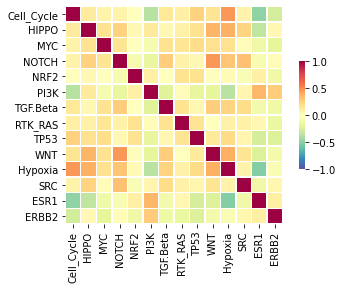

In [27]:
corr2 = recauen_2anys[features].corr()
corr3 = NOrecauen_3anys[features].corr()
corr5s = recauen_5anys[features].corr()
corr5n = NOrecauen_5anys[features].corr()

cmap = sns.color_palette("Spectral_r", as_cmap=True)
sns.heatmap(corr5n, cmap=cmap, vmax=1, vmin=-1,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
recauen_2anys = data[(data['RFS']<730) & (data['RFSE'] == 1)]
NOrecauen_3anys = data[(data['RFS']<1100) & (data['RFSE'] == 0)]

recauen_5anys = data[(data['RFS']<1830) & (data['RFSE'] == 1)]
NOrecauen_5anys = data[(data['RFS']<1830) & (data['RFSE'] == 0)]

features = ['Cell_Cycle', 'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53', 'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2']


NameError: name 'data' is not defined